<a href="https://colab.research.google.com/github/ShaliniAnandaPhD/JAX_Image-classification/blob/main/JAX_XLA_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Detailed Description of Learnings from the JAX/XLA Project

#### Introduction to JAX/XLA
The exploration of JAX/XLA as part of this project offered valuable insights into high-performance numerical computing and machine learning. JAX, a library developed by Google, extends the capabilities of Python by providing an advanced array manipulation interface. Its synergy with XLA (Accelerated Linear Algebra) enables optimized computation, especially beneficial for tasks involving large-scale numerical operations.

#### Key Learnings

1. **Understanding of JAX's Core Features**:
    - **Automatic Differentiation**: JAX's ability to automatically compute derivatives and gradients is a cornerstone for machine learning, significantly easing the implementation of training loops for neural networks.
    - **Just-In-Time Compilation**: The JIT compiler in JAX transforms Python functions into highly efficient machine code, substantially boosting performance. This aspect is particularly crucial when handling large datasets or complex computations.
    - **Vectorization and Parallelism**: JAX's `vmap` and `pmap` functions facilitate easy vectorization of code and parallel execution across multiple devices, a prelude to understanding more complex distributed computing concepts.

2. **Application in Neural Network Training**:
    - Developing a neural network for the MNIST dataset using JAX demonstrated its efficacy in handling typical machine learning workflows.
    - The project emphasized the importance of efficient data handling, model definition, and optimization in a Pythonic way, enhanced by JAX's powerful features.

3. **Experimentation with TPUs in Google Colab**:
    - The use of TPUs (Tensor Processing Units) in Colab provided practical experience with parallel computations, leveraging JAX’s compatibility with TPUs for accelerated performance.

4. **Insights into Multi-Host Training**:
    - While not directly implemented, the project offered theoretical insights into scaling JAX applications for multi-host environments. This is critical for understanding real-world applications where distributed computing is necessary.

#### Importance of Using JAX/XLA over Python

1. **Performance Optimization**:
    - JAX/XLA significantly outperforms standard Python, especially for numerical computations, due to JIT compilation and efficient memory management.

2. **Ease of Scaling**:
    - JAX simplifies the transition from single-device to multi-device or multi-host computations, an area where Python alone falls short.

3. **Advanced Numerical Capabilities**:
    - JAX extends Python's numerical capabilities with advanced features like automatic differentiation and GPU/TPU support, which are essential for modern machine learning and data analysis tasks.

#### Purpose and Scope

- **Learning and Exploration**: The project was primarily educational, aimed at understanding JAX/XLA's capabilities and its application in machine learning and parallel computing.
- **Foundation for Advanced Applications**: While the focus was on learning and experimentation, the insights gained lay the groundwork for tackling more complex, real-world tasks in high-performance computing and AI research.

#### Conclusion

The exploration of JAX/XLA proved to be an enriching experience, highlighting the library's potential in elevating Python's capabilities to meet the demands of modern computational tasks. The project underscored the importance of JAX/XLA in the landscape of numerical computing and machine learning, providing a solid foundation for further exploration and application in more complex scenarios.

*Installing dependancies*

In [1]:
!pip install --upgrade jax jaxlib tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

*Load and Preprocess the Dataset*

11490434/11490434 [==============================] - 1s 0us/step


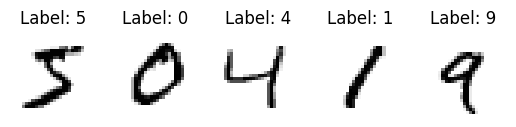

In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display the first 5 images from the training dataset
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


In [6]:
!pip install flax


Step 3: Define the Model
Next, we'll define a simple neural network model using JAX. For simplicity, let's create a two-layer fully connected network.

Step 3.1: Define the Neural Network

In [7]:
import jax
import jax.numpy as jnp
from flax import linen as nn

class SimpleNN(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(128)(x)
        x = nn.relu(x)
        x = nn.Dense(10)(x)
        return nn.softmax(x)

# Initialize the network
key = jax.random.PRNGKey(1)
model = SimpleNN()
dummy_input = jnp.zeros((1, 28*28))  # Example input
params = model.init(key, dummy_input)



In [9]:
!pip install --upgrade jax jaxlib


In [10]:
!pip install optax


Define the Training Loop
Now, we'll implement a training loop that includes forward pass, loss calculation, and backpropagation.

Define Loss Function and Update Step

In [11]:
import optax

# Define the optimizer
optimizer = optax.sgd(learning_rate=0.01)

# Initialize optimizer state
opt_state = optimizer.init(params)

# Update function
def update(params, opt_state, grads):
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state


Training Loop

In [14]:
import numpy as np

# Assuming train_images and train_labels are your training data and labels
batch_size = 128
num_batches = len(train_images) // batch_size

# Create batches
data_batches = [(train_images[i:i+batch_size].reshape(-1, 28*28),
                 train_labels[i:i+batch_size])
                for i in range(0, len(train_images), batch_size)]


In [16]:
import jax.numpy as jnp
from jax import grad, value_and_grad

def loss_fn(params, batch):
    inputs, targets = batch
    # Assume `model` is your neural network model
    preds = model.apply(params, inputs)
    # Using cross-entropy loss
    return -jnp.mean(jnp.sum(targets * jnp.log(preds), axis=1))


One-Hot Encode the Labels: If your labels are not one-hot encoded, you should convert them to a one-hot format to match the shape of the predictions. JAX provides a utility function for this.

In [18]:
from jax.nn import one_hot

def one_hot_labels(labels, num_classes=10):
    return one_hot(labels, num_classes)


Make sure your loss function correctly handles the shapes. Here's an updated version assuming you're working with one-hot encoded labels and a softmax output from your model:

In [19]:
def loss_fn(params, batch):
    inputs, targets = batch
    preds = model.apply(params, inputs)
    targets_one_hot = one_hot_labels(targets)
    return -jnp.mean(jnp.sum(targets_one_hot * jnp.log(preds), axis=1))


Ensure that the labels are properly formatted before they are passed to the loss function.


In [21]:
def loss_fn(params, batch):
    inputs, targets = batch
    preds = model.apply(params, inputs)

    # Reshape predictions if necessary
    preds = preds.reshape(preds.shape[:2])  # Adjust this based on your model's output

    return -jnp.mean(jnp.sum(targets * jnp.log(preds), axis=1))

num_epochs = 10

for epoch in range(num_epochs):
    for inputs, targets in data_batches:
        # Convert targets to one-hot encoding
        targets_one_hot = one_hot_labels(targets)
        batch = (inputs, targets_one_hot)

        # Compute loss and gradients
        loss, grads = value_and_grad(loss_fn)(params, batch)
        params, opt_state = update(params, opt_state, grads)

    print(f"Epoch {epoch+1} completed")


Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed


Model Evaluation

The evaluation step involves running the trained model on a separate test dataset and comparing its predictions against the true labels. Here's a basic way to do it:

Load and Preprocess the Test Data: Ensure that the test data is preprocessed in the same way as the training data.

Define the Accuracy Function: This function will compare the predicted labels with the true labels to calculate the accuracy.

Run the Model on Test Data: Use the trained model to make predictions on the test data.


In [22]:
def accuracy(params, data_loader):
    # Counts the number of correct predictions
    correct = 0
    total = 0
    for inputs, targets in data_loader:
        predicted_probs = model.apply(params, inputs)
        predicted_labels = jnp.argmax(predicted_probs, axis=1)
        correct += jnp.sum(predicted_labels == targets)
        total += len(targets)
    return correct / total

# Create a test data loader
test_data_batches = [(test_images[i:i+batch_size].reshape(-1, 28*28),
                      test_labels[i:i+batch_size])
                     for i in range(0, len(test_images), batch_size)]

# Calculate accuracy on test data
test_accuracy = accuracy(params, test_data_batches)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Test accuracy: 92.16%


In [1]:
!pip install jax[tpu] -f https://storage.googleapis.com/jax-releases/libtpu_releases.html


Looking in links: https://storage.googleapis.com/jax-releases/libtpu_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 MB 2.3 MB/s eta 0:00:00
